## SRUTHY B

# Prediction using Supervised Machine Learning

## Task 1 : Predict percentage of student based on no.of study hours.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

#importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

#importing Scikit-Learn libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

In [2]:
#Reading dataset to python environment
data = 'http://bit.ly/w-data'
df = pd.read_csv(data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 - There are two columns with 25 entries containing float and integer data types.
 - There are no missing values in the given dataset.
 - Target column is 'Scores' and 'Hours' is feature.

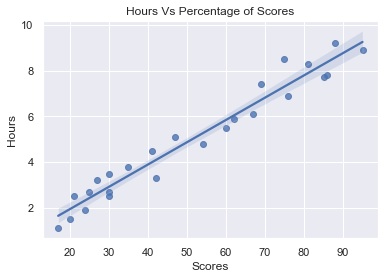

In [5]:
#plotting graphs to check for linear correlation
plt.title('Hours Vs Percentage of Scores') 
sns.regplot(x = "Scores", y = "Hours", data = df)
plt.show()

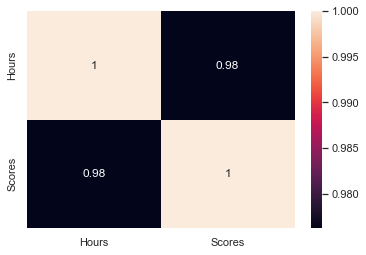

In [6]:
ax = sns.heatmap(df.corr(), annot=True)

#### Remarks: From above graphs a strong positive correlation is observed for variables; 'scores' and 'hours' with correlation coeficient 0.98.

### Seperating Data into target('Scores') and features('Hours')

In [7]:
x = df.drop(['Scores'],axis=1)
y = df['Scores']

In [8]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [9]:
x_train.shape,y_train.shape

((20, 1), (20,))

In [10]:
x_test.shape, y_test.shape

((5, 1), (5,))

### Training Linear Regression algorithm

In [11]:
#creating an instance
lR_model = LinearRegression()

#fitting model to training data
lR_model.fit(x_train,y_train)
print("Training completed")

Training completed


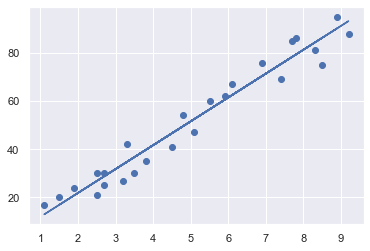

In [12]:
# Plotting the regression line
line = lR_model.coef_*x+lR_model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### Prediction on test data

In [13]:
print(x_test)
y_pred = lR_model.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [14]:
#Comparing Actual vs Predicted values
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
result

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### what will be the predicted score if a student studies for 9.25 hrs/day?

In [15]:
sample = np.array(9.25)
a = sample.reshape(1,-1)
predicted_score = lR_model.predict(a)
print("Predicted percentage of score:",predicted_score)

Predicted percentage of score: [93.69173249]


In [16]:
predicted_score = round(93.69173249, 2)
print(predicted_score)

93.69


In [17]:
print('The predicted score if a student studies for 9.25 hrs/day =' , predicted_score)

The predicted score if a student studies for 9.25 hrs/day = 93.69


### Model Evaluation

In [18]:
print('MSE value is :', mean_squared_error(y_test,y_pred))
print('R2 value:', r2_score(y_test,y_pred))

MSE value is : 21.5987693072174
R2 value: 0.9454906892105356
